In [2]:
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit
import pandas as pd

In [3]:
data_400 = './Zn_data/03112020_MnO2_RDE_50mVs_400rpm_ExtendedBounds_120mL_counter_C04_C03.txt'
data_2500 = './Zn_data/03112020_MnO2_RDE_50mVs_2500rpm_ExtendedBounds_120mL_counter_C04_C03.txt'

In [4]:
rpm400 = pd.read_csv(data_400,sep='\t',header=(56),usecols=range(12)) 
rpm2500 = pd.read_csv(data_2500,sep='\t',header=(54),usecols=range(12)) 

In [5]:
data = rpm400
data

,mode,ox/red,error,control changes,counter inc.,time/s,control/V,Ewe/V,<I>/mA,cycle number,(Q-Qo)/C,<Ece>/V
0,2,1,0,0,0,0.00000,-0.997045,-0.997302,-0.159973,1.0,0.000000,-0.118275
1,2,1,0,0,0,0.01100,-0.996496,-0.996825,-0.152165,1.0,-0.000002,-0.111625
2,2,1,0,0,0,0.03100,-0.995495,-0.995852,-0.140781,1.0,-0.000005,-0.100811
3,2,1,0,0,0,0.05100,-0.994495,-0.994841,-0.132310,1.0,-0.000007,-0.091003
4,2,1,0,0,0,0.07100,-0.993495,-0.993810,-0.125486,1.0,-0.000010,-0.083295
...,...,...,...,...,...,...,...,...,...,...,...,...
19173,2,1,0,1,1,383.88639,-1.002597,-1.002900,-0.044938,3.0,-0.010563,-0.110269
19174,2,1,0,1,1,383.90639,-1.001597,-1.001877,-0.044787,3.0,-0.010564,-0.112210
19175,2,1,0,1,1,383.92639,-1.000597,-1.000927,-0.044668,3.0,-0.010565,-0.114157
19176,2,1,0,1,1,383.93739,-1.000046,-1.000374,-0.044608,3.0,-0.010565,-0.115131


In [6]:
# #For RPM2500
# Ece = np.array(data['EceV'])
# Current = np.array(data['ImA'])
# cycles = data['cycle number']
# time = data['times']

# For RPM400:
Ece = np.array(data['<Ece>/V'])
Current = np.array(data['<I>/mA'])
cycles = data['cycle number']
time = data['time/s']

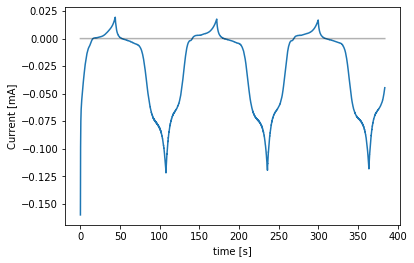

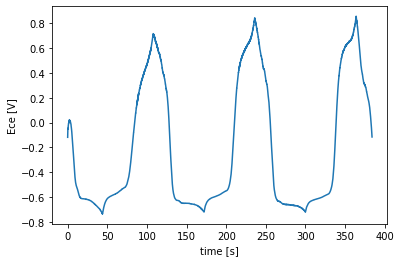

In [7]:
plt.plot(time, Current)
plt.plot(time,np.zeros_like(time),'k',alpha=0.3)
plt.ylabel('Current [mA]')
plt.xlabel('time [s]')
plt.show()

plt.plot(time,Ece)
plt.ylabel('Ece [V]')
plt.xlabel('time [s]')
plt.show()

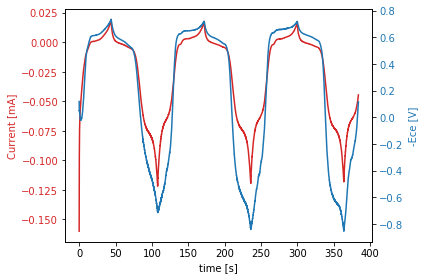

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time [s]')
ax1.set_ylabel('Current [mA]', color=color)
ax1.plot(time, Current,color=color)
# ax1.plot(times,Power_demands, '*',color='tab:grey',label = 'Power Demand (kW)')
ax1.tick_params(axis='y', labelcolor=color)
# plt.legend(loc = 'upper center')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('-Ece [V]', color=color)  # we already handled the x-label with ax1
ax2.plot(time,(-1)*np.array(Ece), '-',color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

In [9]:
#Looking for equilibrium voltage
ocvs = []
small_currents = []
print('{:9s} {:17s} {:14s}'.format('time[s]','current [mA]','V'))
for l in range(len(Current)):
    if abs(Current[l]) < 1e-5: #when current ~0
        print('{:5.1f} {:12.1e} {:12.3f}'.format(time[l],Current[l],Ece[l]))
        value = Ece[l] 
        ocvs.append(value)
        small_currents.append(Current[l])
            
# equil_potential = np.average(ocvs)
# min_index = np.argmin(abs(np.array(small_currents)))
min_index = -1
equil_potential = ocvs[min_index] #the voltage that corresponds to the smallest value for current in cycle 3
equil_potential

time[s]   current [mA]      V             
 52.4      9.1e-06       -0.598
 52.5      8.9e-06       -0.597
 52.5     -3.8e-06       -0.597
 52.5     -7.1e-06       -0.597
181.3      3.2e-06       -0.605
181.3     -4.7e-06       -0.605
181.3     -9.7e-06       -0.605
181.4     -7.5e-06       -0.605
309.3      5.6e-06       -0.624
309.4      6.5e-06       -0.623
309.4      5.1e-06       -0.623
309.4     -8.1e-06       -0.623


-0.62327188

In [10]:
E_cycle1 = []
E_cycle2 = []
E_cycle3 = []
E_cycle4 = []

I_cycle1 = []
I_cycle2 = []
I_cycle3 = []
I_cycle4 = []

for m in range(len(cycles)):
    if cycles[m] == 1:
        E_cycle1.append(Ece[m])
        I_cycle1.append(Current[m])
    elif cycles[m] == 2:
        E_cycle2.append(Ece[m])
        I_cycle2.append(Current[m])
    elif cycles[m] == 3:
        E_cycle3.append(Ece[m])
        I_cycle3.append(Current[m])
    elif cycles[m] == 4:
        E_cycle4.append(Ece[m])
        I_cycle4.append(Current[m])

print(len(E_cycle1), len(E_cycle2), len(E_cycle3), len(E_cycle4))
print('cycles are different lengths- be aware when trying to compare')

6389 6394 6395 0
cycles are different lengths- be aware when trying to compare


Text(0.5, 0, 'Abs. Value of Current [mA]')

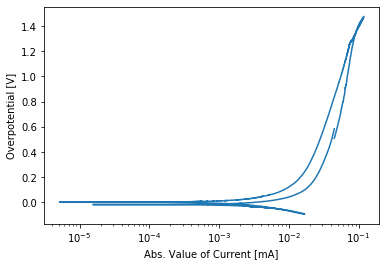

In [11]:
overpotentials = np.array(E_cycle3) - equil_potential
overpotentials

fig, ax = plt.subplots()
# ax.set_xscale('log', basex=np.e)
ax.set_xscale('log', basex=10)
plt.plot(abs(np.array(I_cycle3)),overpotentials)
plt.ylabel('Overpotential [V]')
plt.xlabel('Abs. Value of Current [mA]')

For cycle 3

In [12]:
equil_potential

-0.62327188

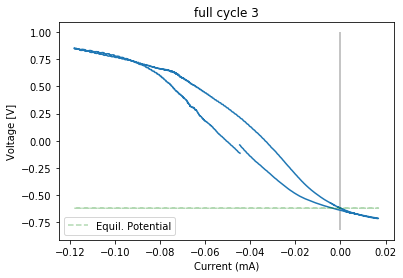

In [13]:
plt.plot(I_cycle3,np.array(E_cycle3))
plt.plot(I_cycle3,np.ones_like(I_cycle3)*equil_potential,'--g',label = 'Equil. Potential',alpha=.3)
plt.ylabel('Voltage [V]')
plt.xlabel('Current (mA)')
plt.title('full cycle 3')
plt.vlines(0,equil_potential-.2,1,alpha=.3)
plt.legend(loc='lower left')
plt.show()

In [14]:
equil_potential - min(E_cycle3) + equil_potential
max(I_cycle3)

0.01682741753757

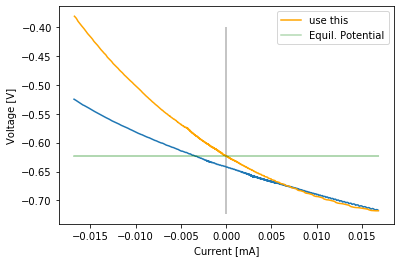

<function matplotlib.pyplot.show(*args, **kw)>

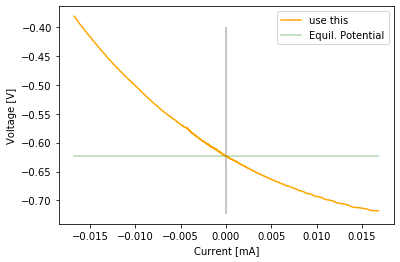

In [15]:
good_V = []
good_I = []

for i in range(len(E_cycle3)):
#     if E_cycle3[i]<-.42 and E_cycle3[i]>min(E_cycle3):
    if I_cycle3[i]<max(I_cycle3) and I_cycle3[i]>-max(I_cycle3):
        good_V.append(E_cycle3[i])
        good_I.append(I_cycle3[i])

h = int(len(good_I)/1.9)
plt.plot(good_I[0:h],good_V[0:h])
plt.plot(good_I[h:],good_V[h:], 'orange',label = 'use this')
plt.plot(good_I,np.ones_like(good_I)*equil_potential,'g',label = 'Equil. Potential',alpha=.3)
plt.vlines(0,equil_potential-.1,-.4,alpha=.3)
plt.ylabel('Voltage [V]')
plt.xlabel('Current [mA]')
plt.legend()
plt.show()
use_V = good_V[h:]
use_I = good_I[h:]

min_index = np.argmin(abs(np.array(use_I)))
equil_potential = use_V[min_index]
use_V[min_index],use_I[min_index]
equil_potential

#just the values we want 
plt.plot(good_I[h:],good_V[h:], 'orange',label = 'use this')
plt.plot(good_I[h:],np.ones_like(good_I[h:])*equil_potential,'g',label = 'Equil. Potential',alpha=.3)
plt.vlines(0,equil_potential-.1,-.4,alpha=.3)
plt.ylabel('Voltage [V]')
plt.xlabel('Current [mA]')
plt.legend()
plt.show

In [16]:
# plt.plot(np.array(use_v),use_current_densities)
# plt.plot(use_v,np.zeros_like(use_v))
# plt.xlabel('Voltage (V)')
# plt.ylabel('Current density (mA/m^2)')
# plt.show()

def BV(E_cell, j0, aa, ac):
    '''
    takes in cell potential [V] + parameters:j0 [A/m^2],aa,ac
    returns current DENSITY [A/m^2]
    '''
    F = 96485.33212 #C/mol
    R = 8.314 #J/mol-K
    T = 293 #K
#     equil_voltage = 0.5507 #V
#     equil_voltage = 0.3 #V

    #The equil_voltage = cell voltage when current = 0 for cycle 3
    equil_voltage = equil_potential #from above
    overpotential = E_cell - equil_voltage
    z = 2
    
    j = j0*(np.exp(aa*z*F*overpotential*(R*T)**(-1))-np.exp(-ac*z*F*overpotential*(R*T)**(-1)))
    
    return j

### Testing with 1 cycle:

In [17]:
diam_mm = 3 #mm. Diam of RDE used for this experimental data
D = diam_mm/1000
A = np.pi*D**2/4 #m^2
A

7.068583470577034e-06

In [18]:
length = 20
use_current_densities = np.array(use_I)/A/1000 #A/m^2
print('Max current is {:.1f} amps\nMin current is {:.1f} amps'.format(max(use_current_densities),min(use_current_densities)))
j0_guesses = np.linspace(min(use_current_densities),max(use_current_densities),length)
aa0_guesses = np.linspace(0.001,.87,len(j0_guesses))
ac0_guesses = np.linspace(0.003,.9,len(j0_guesses))

#matrix of all combinations of these guesses:
p0s = np.array(np.meshgrid(j0_guesses,aa0_guesses,ac0_guesses)).T.reshape(-1,3)

np.shape(p0s)

Max current is 2.4 amps
Min current is -2.4 amps


(8000, 3)

### Testing with 1 guess

In [19]:
# ans = curve_fit(BV,use_v,use_current_densities,[.5,.5,.5],bounds=([-np.inf,0,0],[np.inf,2,2]),maxfev=4000)
ans = curve_fit(BV,use_V,use_current_densities,[.5,.5,.5],maxfev=4000)
j0_fit, aa_fit, ac_fit = ans[0]
print('j0,aa,ac:', j0_fit, aa_fit, ac_fit)
pcov = ans[1]
perr = np.sqrt(np.diag(pcov))
print('errors:',perr)
print('errors r this % of values:',perr/ans[0]*100 )

j0,aa,ac: -1.0988046549566917 0.044160787441901043 0.13348465280921032
errors: [0.00593491 0.00032254 0.00054976]
errors r this % of values: [-0.54012434  0.73036516  0.4118525 ]


In [20]:
identified_js = []
identified_aas = []
identified_acs = []

for m in range(len(p0s)):
    try: 
        anss = curve_fit(BV,use_V,use_current_densities,p0s[m])
#         anss = curve_fit(BV,use_V,use_I,p0s[m],maxfev=8000)
        gs = anss[0] 
        
        alphas_are_positive = gs[1]>0 and gs[2]>0
        j0_not_zero = abs(gs[0])>1e-4
#         j0_not_zero = True
        different_from_guess = abs(gs[0]-p0s[m,0])>1e-2 and abs(gs[1]-p0s[m,1])>1e-3 and abs(gs[2]-p0s[m,2])>1e-3 
#         different_from_guess = gs[0] - p0s[m,0] !=0 and gs[1]-p0s[m,1]!=0  and gs[2]-p0s[m,2]!=0  
        alphas_big = gs[1]>0.1 and gs[2]>0.1
        a_sum = gs[1] + gs[2]
        one_ish = a_sum < 1.2 and a_sum<.8
        
        if alphas_are_positive and different_from_guess and j0_not_zero:
            print('guess:',p0s[m],'\ngenerated:',anss[0],'\nerrors:',np.sqrt(np.diag(anss[1])),'\n')
            identified_js.append(gs[0])
            identified_aas.append(gs[1])
            print('aa: {:.4f}'.format(gs[1]))
            identified_acs.append(gs[2])
            print('ac: {:.4f}'.format(gs[2]))
#             
    except RuntimeError:
        print('runtime error\n')


guess: [-2.37171364e+00  1.00000000e-03  3.00000000e-03] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.04673684  0.003     ] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.09247368  0.003     ] 
generated: [-1.09880453  0.04416079  0.13348467] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.13821053  0.003     ] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.18394737  0.003     ] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.22968421  0.003     ] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2

/Users/alexisdubs/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: overflow encountered in exp


guess: [-2.37171364  0.87        0.003     ] 
generated: [-1.09880422  0.04416081  0.13348469] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969e+00  1.00000000e-03  3.00000000e-03] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.04673684  0.003     ] 
generated: [-1.09880473  0.04416078  0.13348465] 
errors: [0.00593496 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.09247368  0.003     ] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.13821053  0.003     ] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.18394737  0.003     ] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2

guess: [-1.62140178  0.73278947  0.003     ] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.77852632  0.003     ] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.82426316  0.003     ] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.87        0.003     ] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782e+00  1.00000000e-03  3.00000000e-03] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.04673684  0.003     ] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1

guess: [-0.87108991  0.73278947  0.003     ] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.77852632  0.003     ] 
generated: [-1.09880442  0.0441608   0.13348468] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.82426316  0.003     ] 
generated: [-1.09880453  0.04416079  0.13348466] 
errors: [0.00593499 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.87        0.003     ] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.001       0.003     ] 
generated: [-1.09880476  0.04416078  0.13348464] 
errors: [0.00593518 0.00032254 0.00054977] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.04673684  0.003     ] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0

guess: [-0.12077805  0.77852632  0.003     ] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.82426316  0.003     ] 
generated: [-1.09880472  0.04416078  0.13348466] 
errors: [0.00593462 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.87        0.003     ] 
generated: [-1.09880473  0.04416078  0.13348464] 
errors: [0.00593499 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.73278947 0.003     ] 
generated: [-1.09880452  0.04416079  0.13348467] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.87       0.003     ] 
generated: [-1.09880468  0.04416079  0.13348465] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.73278947 0.003     ] 
generated: [-1.09880473  0.04416078  0.13348465] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.77852632 0

guess: [1.62994964 0.54984211 0.003     ] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.59557895 0.003     ] 
generated: [-1.09880446  0.0441608   0.13348467] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.64131579 0.003     ] 
generated: [-1.0988045   0.04416079  0.13348467] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.68705263 0.003     ] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.73278947 0.003     ] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.77852632 0.003     ] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.82426316 0.003     

guess: [-2.37171364  0.41263158  0.05021053] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.45836842  0.05021053] 
generated: [-1.09880431  0.0441608   0.13348469] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.50410526  0.05021053] 
generated: [-1.09880435  0.0441608   0.13348468] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.54984211  0.05021053] 
generated: [-1.09880454  0.04416079  0.13348467] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.59557895  0.05021053] 
generated: [-1.09880469  0.04416079  0.13348465] 
errors: [0.00593502 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.64131579  0.05021053] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0

guess: [-1.62140178  0.82426316  0.05021053] 
generated: [-1.09880463  0.04416079  0.13348465] 
errors: [0.00593499 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.87        0.05021053] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782e+00  1.00000000e-03  5.02105263e-02] 
generated: [-1.0988047   0.04416078  0.13348465] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.04673684  0.05021053] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.09247368  0.05021053] 
generated: [-1.09880437  0.0441608   0.13348469] 
errors: [0.00593468 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.13821053  0.05021053] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1

guess: [-0.87108991  0.50410526  0.05021053] 
generated: [-1.09880446  0.0441608   0.13348467] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.54984211  0.05021053] 
generated: [-1.09880452  0.04416079  0.13348467] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.59557895  0.05021053] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.64131579  0.05021053] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.68705263  0.05021053] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.73278947  0.05021053] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0

guess: [0.12932591 0.59557895 0.05021053] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.73278947 0.05021053] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.45836842 0.05021053] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593491 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.50410526 0.05021053] 
generated: [-1.09880431  0.0441608   0.13348469] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.54984211 0.05021053] 
generated: [-1.09880445  0.0441608   0.13348467] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.59557895 0.05021053] 
generated: [-1.09880478  0.04416078  0.13348465] 
errors: [0.00593475 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.64131579 0.05021053

guess: [1.37984568 0.27542105 0.05021053] 
generated: [-1.09880473  0.04416078  0.13348465] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.32115789 0.05021053] 
generated: [-1.09880435  0.0441608   0.13348468] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.36689474 0.05021053] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.41263158 0.05021053] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.45836842 0.05021053] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.50410526 0.05021053] 
generated: [-1.09880442  0.0441608   0.13348468] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.54984211 0.05021053

guess: [2.13015755 0.68705263 0.05021053] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.73278947 0.05021053] 
generated: [-1.09880406  0.04416082  0.13348472] 
errors: [0.0059346  0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.77852632 0.05021053] 
generated: [-1.09880455  0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.82426316 0.05021053] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.87       0.05021053] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.09247368 0.05021053] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.13821053 0.05021053

guess: [-1.87150573  0.18394737  0.09742105] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.22968421  0.09742105] 
generated: [-1.09880452  0.04416079  0.13348467] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.27542105  0.09742105] 
generated: [-1.09880421  0.04416081  0.13348469] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.32115789  0.09742105] 
generated: [-1.09880446  0.0441608   0.13348467] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.36689474  0.09742105] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.41263158  0.09742105] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0

guess: [-1.12119387  0.73278947  0.09742105] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.77852632  0.09742105] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.82426316  0.09742105] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.001       0.09742105] 
generated: [-1.09880478  0.04416078  0.13348464] 
errors: [0.00593494 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.04673684  0.09742105] 
generated: [-1.09880432  0.0441608   0.13348469] 
errors: [0.00593476 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.09247368  0.09742105] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0

guess: [-0.12077805  0.27542105  0.09742105] 
generated: [-1.09880447  0.0441608   0.13348467] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.32115789  0.09742105] 
generated: [-1.0988047   0.04416078  0.13348465] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.36689474  0.09742105] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.41263158  0.09742105] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.45836842  0.09742105] 
generated: [-1.09880473  0.04416078  0.13348465] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.50410526  0.09742105] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0

errors: [0.00593473 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.27542105 0.09742105] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.32115789 0.09742105] 
generated: [-1.09880456  0.04416079  0.13348466] 
errors: [0.00593491 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.36689474 0.09742105] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593491 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.41263158 0.09742105] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.45836842 0.09742105] 
generated: [-1.09880423  0.04416081  0.1334847 ] 
errors: [0.00593468 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.50410526 0.09742105] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.0005497

guess: [1.62994964 0.82426316 0.09742105] 
generated: [-1.09880461  0.04416079  0.13348467] 
errors: [0.00593457 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.87       0.09742105] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.04673684 0.09742105] 
generated: [-1.09880448  0.0441608   0.13348467] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.09247368 0.09742105] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.13821053 0.09742105] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.18394737 0.09742105] 
generated: [-1.09880412  0.04416081  0.1334847 ] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.22968421 0.09742105

guess: [-2.37171364  0.77852632  0.14463158] 
generated: [-1.09880436  0.0441608   0.13348468] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.82426316  0.14463158] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.87        0.14463158] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969e+00  1.00000000e-03  1.44631579e-01] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.04673684  0.14463158] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.09247368  0.14463158] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2

guess: [-1.62140178  0.54984211  0.14463158] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.59557895  0.14463158] 
generated: [-1.09880454  0.04416079  0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.64131579  0.14463158] 
generated: [-1.09880432  0.0441608   0.13348469] 
errors: [0.00593473 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.68705263  0.14463158] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.73278947  0.14463158] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.77852632  0.14463158] 
generated: [-1.09880447  0.0441608   0.13348467] 
errors: [0.00593505 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0

guess: [-0.62098596  0.22968421  0.14463158] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.27542105  0.14463158] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.32115789  0.14463158] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.36689474  0.14463158] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.41263158  0.14463158] 
generated: [-1.09880446  0.0441608   0.13348467] 
errors: [0.00593498 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.45836842  0.14463158] 
generated: [-1.09880497  0.04416077  0.13348462] 
errors: [0.00593508 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0

guess: [0.12932591 0.68705263 0.14463158] 
generated: [-1.09880468  0.04416079  0.13348465] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.04673684 0.14463158] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.22968421 0.14463158] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.27542105 0.14463158] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.32115789 0.14463158] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.36689474 0.14463158] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.41263158 0.14463158

guess: [1.12974173 0.27542105 0.14463158] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.32115789 0.14463158] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.36689474 0.14463158] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.41263158 0.14463158] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.45836842 0.14463158] 
generated: [-1.0988048   0.04416078  0.13348464] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.50410526 0.14463158] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.54984211 0.14463158

guess: [1.88005359 0.45836842 0.14463158] 
generated: [-1.09880423  0.04416081  0.13348469] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.50410526 0.14463158] 
generated: [-1.09880455  0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.54984211 0.14463158] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.59557895 0.14463158] 
generated: [-1.0988045   0.04416079  0.13348467] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.64131579 0.14463158] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.68705263 0.14463158] 
generated: [-1.09880495  0.04416077  0.13348462] 
errors: [0.00593515 0.00032254 0.00054977] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.73278947 0.14463158

guess: [-2.37171364  0.50410526  0.19184211] 
generated: [-1.09880473  0.04416078  0.13348465] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.54984211  0.19184211] 
generated: [-1.0988042   0.04416081  0.1334847 ] 
errors: [0.00593467 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.59557895  0.19184211] 
generated: [-1.09880454  0.04416079  0.13348467] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.64131579  0.19184211] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.68705263  0.19184211] 
generated: [-1.09880442  0.0441608   0.13348467] 
errors: [0.00593506 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.73278947  0.19184211] 
generated: [-1.09880455  0.04416079  0.13348466] 
errors: [0.00593493 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0

guess: [-1.62140178  0.87        0.19184211] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782e+00  1.00000000e-03  1.91842105e-01] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.04673684  0.19184211] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.09247368  0.19184211] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.13821053  0.19184211] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.18394737  0.19184211] 
generated: [-1.09880475  0.04416078  0.13348465] 
errors: [0.00593477 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1

generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.59557895  0.19184211] 
generated: [-1.09880435  0.0441608   0.13348469] 
errors: [0.00593474 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.64131579  0.19184211] 
generated: [-1.09880427  0.04416081  0.13348469] 
errors: [0.00593476 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.68705263  0.19184211] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.73278947  0.19184211] 
generated: [-1.09880443  0.0441608   0.13348467] 
errors: [0.00593492 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.77852632  0.19184211] 
generated: [-1.0988045   0.04416079  0.13348467] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.82426316  0.19184211] 
generated: [-1.0988044

guess: [-0.12077805  0.77852632  0.19184211] 
generated: [-1.09880468  0.04416079  0.13348465] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.82426316  0.19184211] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.87        0.19184211] 
generated: [-1.09880468  0.04416079  0.13348465] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.04673684 0.19184211] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.09247368 0.19184211] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.27542105 0.19184211] 
generated: [-1.09880468  0.04416079  0.13348465] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.45836842 0

guess: [0.87963777 0.41263158 0.19184211] 
generated: [-1.09880449  0.04416079  0.13348467] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.45836842 0.19184211] 
generated: [-1.09880449  0.0441608   0.13348467] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.50410526 0.19184211] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.54984211 0.19184211] 
generated: [-1.09880449  0.0441608   0.13348467] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.59557895 0.19184211] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593494 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.64131579 0.19184211] 
generated: [-1.09880473  0.04416078  0.13348465] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.68705263 0.19184211

guess: [1.62994964 0.09247368 0.19184211] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.13821053 0.19184211] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.18394737 0.19184211] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593496 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.22968421 0.19184211] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.27542105 0.19184211] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.32115789 0.19184211] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.36689474 0.19184211

guess: [2.13015755 0.64131579 0.19184211] 
generated: [-1.0988047   0.04416078  0.13348465] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.68705263 0.19184211] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.73278947 0.19184211] 
generated: [-1.09880423  0.04416081  0.1334847 ] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.77852632 0.19184211] 
generated: [-1.09880468  0.04416078  0.13348465] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.82426316 0.19184211] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.87       0.19184211] 
generated: [-1.09880453  0.04416079  0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.38026150e+00 1.00000000e-03 1.

guess: [-2.12160969  0.64131579  0.23905263] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.68705263  0.23905263] 
generated: [-1.09880453  0.04416079  0.13348467] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.73278947  0.23905263] 
generated: [-1.0988047   0.04416079  0.13348464] 
errors: [0.00593511 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.77852632  0.23905263] 
generated: [-1.09880497  0.04416077  0.13348462] 
errors: [0.00593513 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.82426316  0.23905263] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.87        0.23905263] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573e+0

guess: [-1.37129782  0.54984211  0.23905263] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.59557895  0.23905263] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.64131579  0.23905263] 
generated: [-1.09880477  0.04416078  0.13348465] 
errors: [0.00593473 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.68705263  0.23905263] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.73278947  0.23905263] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.77852632  0.23905263] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0

guess: [-0.370882    0.50410526  0.23905263] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.54984211  0.23905263] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.59557895  0.23905263] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.64131579  0.23905263] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.68705263  0.23905263] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.73278947  0.23905263] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0

guess: [0.62953382 0.27542105 0.23905263] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.00593465 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.32115789 0.23905263] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593494 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.36689474 0.23905263] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.41263158 0.23905263] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.45836842 0.23905263] 
generated: [-1.09880492  0.04416077  0.13348463] 
errors: [0.00593492 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.50410526 0.23905263] 
generated: [-1.09880438  0.0441608   0.13348468] 
errors: [0.00593476 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.54984211 0.23905263

guess: [1.62994964 0.09247368 0.23905263] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.13821053 0.23905263] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.18394737 0.23905263] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593496 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.22968421 0.23905263] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.27542105 0.23905263] 
generated: [-1.09880454  0.04416079  0.13348466] 
errors: [0.00593494 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.32115789 0.23905263] 
generated: [-1.09880448  0.0441608   0.13348467] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.36689474 0.23905263

guess: [2.13015755 0.64131579 0.23905263] 
generated: [-1.09880486  0.04416078  0.13348463] 
errors: [0.00593497 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.68705263 0.23905263] 
generated: [-1.09880454  0.04416079  0.13348467] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.73278947 0.23905263] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.77852632 0.23905263] 
generated: [-1.09880474  0.04416078  0.13348465] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.82426316 0.23905263] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.87       0.23905263] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.38026150e+00 1.00000000e-03 2.

guess: [-2.12160969  0.41263158  0.28626316] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.45836842  0.28626316] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.50410526  0.28626316] 
generated: [-1.09880443  0.0441608   0.13348467] 
errors: [0.00593494 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.54984211  0.28626316] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.59557895  0.28626316] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593495 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.64131579  0.28626316] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0

guess: [-1.37129782  0.27542105  0.28626316] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.32115789  0.28626316] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.36689474  0.28626316] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.41263158  0.28626316] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.45836842  0.28626316] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.50410526  0.28626316] 
generated: [-1.09880421  0.04416081  0.1334847 ] 
errors: [0.00593471 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0

guess: [-0.62098596  0.13821053  0.28626316] 
generated: [-1.09880468  0.04416078  0.13348465] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.18394737  0.28626316] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593495 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.22968421  0.28626316] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.27542105  0.28626316] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593477 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.32115789  0.28626316] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.36689474  0.28626316] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0

guess: [0.12932591 0.04673684 0.28626316] 
generated: [-1.0988044   0.0441608   0.13348468] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.09247368 0.28626316] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.13821053 0.28626316] 
generated: [-1.09880484  0.04416078  0.13348464] 
errors: [0.00593477 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.18394737 0.28626316] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.36689474 0.28626316] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.41263158 0.28626316] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.45836842 0.28626316

guess: [0.62953382 0.77852632 0.28626316] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.00593492 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.82426316 0.28626316] 
generated: [-1.09880454  0.04416079  0.13348466] 
errors: [0.00593499 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.87       0.28626316] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.001      0.28626316] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593491 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.04673684 0.28626316] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.09247368 0.28626316] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.13821053 0.28626316

guess: [1.37984568 0.73278947 0.28626316] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.77852632 0.28626316] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.82426316 0.28626316] 
generated: [-1.09880447  0.0441608   0.13348467] 
errors: [0.00593492 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.87       0.28626316] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964e+00 1.00000000e-03 2.86263158e-01] 
generated: [-1.09880428  0.0441608   0.13348469] 
errors: [0.00593468 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.04673684 0.28626316] 
generated: [-1.09880458  0.04416079  0.13348467] 
errors: [0.00593461 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.0924736

guess: [2.3802615  0.50410526 0.28626316] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.54984211 0.28626316] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.59557895 0.28626316] 
generated: [-1.09880442  0.0441608   0.13348467] 
errors: [0.00593492 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.64131579 0.28626316] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.68705263 0.28626316] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.73278947 0.28626316] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.77852632 0.28626316

guess: [-1.87150573  0.54984211  0.33347368] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.59557895  0.33347368] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.64131579  0.33347368] 
generated: [-1.09880425  0.04416081  0.1334847 ] 
errors: [0.00593469 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.68705263  0.33347368] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.73278947  0.33347368] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.77852632  0.33347368] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0

guess: [-1.12119387  0.64131579  0.33347368] 
generated: [-1.0988044   0.0441608   0.13348468] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.68705263  0.33347368] 
generated: [-1.0988045   0.04416079  0.13348467] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.73278947  0.33347368] 
generated: [-1.09880428  0.04416081  0.13348469] 
errors: [0.0059347  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.77852632  0.33347368] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.82426316  0.33347368] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.87        0.33347368] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0

guess: [-0.370882    0.68705263  0.33347368] 
generated: [-1.0988045   0.04416079  0.13348467] 
errors: [0.00593467 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.73278947  0.33347368] 
generated: [-1.09880475  0.04416078  0.13348465] 
errors: [0.00593468 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.77852632  0.33347368] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.82426316  0.33347368] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.87        0.33347368] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.001       0.33347368] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.41263158 0.33347368] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.45836842 0.33347368] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.50410526 0.33347368] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.54984211 0.33347368] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.59557895 0.33347368] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.64131579 0.33347368] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986

guess: [1.12974173 0.13821053 0.33347368] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.18394737 0.33347368] 
generated: [-1.09880451  0.0441608   0.13348466] 
errors: [0.00593501 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.22968421 0.33347368] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.27542105 0.33347368] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593492 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.32115789 0.33347368] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.36689474 0.33347368] 
generated: [-1.0988048   0.04416078  0.13348464] 
errors: [0.00593472 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.41263158 0.33347368

guess: [1.88005359 0.22968421 0.33347368] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.27542105 0.33347368] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.32115789 0.33347368] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.36689474 0.33347368] 
generated: [-1.09880436  0.0441608   0.13348468] 
errors: [0.00593475 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.41263158 0.33347368] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.45836842 0.33347368] 
generated: [-1.09880465  0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.50410526 0.33347368

guess: [-2.37171364  0.27542105  0.38068421] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.32115789  0.38068421] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.36689474  0.38068421] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.41263158  0.38068421] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.45836842  0.38068421] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.50410526  0.38068421] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0

guess: [-1.62140178  0.45836842  0.38068421] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.50410526  0.38068421] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.54984211  0.38068421] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.59557895  0.38068421] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.64131579  0.38068421] 
generated: [-1.09880431  0.0441608   0.13348469] 
errors: [0.00593475 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.68705263  0.38068421] 
generated: [-1.09880449  0.0441608   0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0

guess: [-0.87108991  0.41263158  0.38068421] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.45836842  0.38068421] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.50410526  0.38068421] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.54984211  0.38068421] 
generated: [-1.09880446  0.0441608   0.13348467] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.59557895  0.38068421] 
generated: [-1.09880449  0.0441608   0.13348467] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.64131579  0.38068421] 
generated: [-1.09880454  0.04416079  0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0

guess: [-0.12077805  0.50410526  0.38068421] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.54984211  0.38068421] 
generated: [-1.09880482  0.04416078  0.13348464] 
errors: [0.00593467 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.59557895  0.38068421] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.64131579  0.38068421] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.68705263  0.38068421] 
generated: [-1.09880468  0.04416079  0.13348465] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.73278947  0.38068421] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0

guess: [0.87963777 0.64131579 0.38068421] 
generated: [-1.0988045   0.04416079  0.13348467] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.68705263 0.38068421] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.73278947 0.38068421] 
generated: [-1.09880484  0.04416077  0.13348464] 
errors: [0.00593467 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.77852632 0.38068421] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.82426316 0.38068421] 
generated: [-1.09880426  0.04416081  0.13348469] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.87       0.38068421] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173e+00 1.00000000e-03 3.

guess: [1.62994964 0.54984211 0.38068421] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.59557895 0.38068421] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.64131579 0.38068421] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.68705263 0.38068421] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.73278947 0.38068421] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.77852632 0.38068421] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.82426316 0.38068421

guess: [2.3802615  0.36689474 0.38068421] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.41263158 0.38068421] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.45836842 0.38068421] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.50410526 0.38068421] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.54984211 0.38068421] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.59557895 0.38068421] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.64131579 0.38068421

guess: [-1.87150573  0.50410526  0.42789474] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.54984211  0.42789474] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.59557895  0.42789474] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.64131579  0.42789474] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.68705263  0.42789474] 
generated: [-1.09880442  0.0441608   0.13348468] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.73278947  0.42789474] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0

guess: [-1.12119387  0.68705263  0.42789474] 
generated: [-1.09880415  0.04416081  0.13348471] 
errors: [0.00593464 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.73278947  0.42789474] 
generated: [-1.09880449  0.0441608   0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.77852632  0.42789474] 
generated: [-1.09880444  0.0441608   0.13348468] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.82426316  0.42789474] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.87        0.42789474] 
generated: [-1.09880438  0.0441608   0.13348468] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.001       0.42789474] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0

guess: [-0.370882    0.73278947  0.42789474] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.77852632  0.42789474] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.82426316  0.42789474] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.87        0.42789474] 
generated: [-1.0988043   0.0441608   0.13348469] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.001       0.42789474] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.04673684  0.42789474] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0

guess: [0.37942986 0.54984211 0.42789474] 
generated: [-1.09880435  0.0441608   0.13348468] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.59557895 0.42789474] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.64131579 0.42789474] 
generated: [-1.09880426  0.04416081  0.13348469] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.68705263 0.42789474] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.73278947 0.42789474] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.77852632 0.42789474] 
generated: [-1.09880441  0.0441608   0.13348468] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.82426316 0.42789474

guess: [1.12974173 0.64131579 0.42789474] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593493 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.68705263 0.42789474] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.73278947 0.42789474] 
generated: [-1.09880478  0.04416078  0.13348465] 
errors: [0.00593474 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.77852632 0.42789474] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.82426316 0.42789474] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.87       0.42789474] 
generated: [-1.09880453  0.04416079  0.13348467] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568e+00 1.00000000e-03 4.

guess: [1.88005359 0.68705263 0.42789474] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.73278947 0.42789474] 
generated: [-1.09880446  0.0441608   0.13348467] 
errors: [0.00593505 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.77852632 0.42789474] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.82426316 0.42789474] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.00593477 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.87       0.42789474] 
generated: [-1.0988042   0.04416081  0.1334847 ] 
errors: [0.00593468 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755e+00 1.00000000e-03 4.27894737e-01] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.0467368

guess: [-2.37171364  0.77852632  0.47510526] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.82426316  0.47510526] 
generated: [-1.0988042   0.04416081  0.1334847 ] 
errors: [0.00593467 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.87        0.47510526] 
generated: [-1.09880423  0.04416081  0.1334847 ] 
errors: [0.00593472 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969e+00  1.00000000e-03  4.75105263e-01] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.04673684  0.47510526] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.09247368  0.47510526] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2

guess: [-1.62140178  0.82426316  0.47510526] 
generated: [-1.09880437  0.0441608   0.13348468] 
errors: [0.00593476 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.87        0.47510526] 
generated: [-1.09880483  0.04416078  0.13348463] 
errors: [0.00593506 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782e+00  1.00000000e-03  4.75105263e-01] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.04673684  0.47510526] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.09247368  0.47510526] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.13821053  0.47510526] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1

guess: [-0.87108991  0.87        0.47510526] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.001       0.47510526] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.04673684  0.47510526] 
generated: [-1.0988045   0.0441608   0.13348466] 
errors: [0.00593501 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.09247368  0.47510526] 
generated: [-1.09880444  0.0441608   0.13348468] 
errors: [0.00593473 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.13821053  0.47510526] 
generated: [-1.09880439  0.0441608   0.13348468] 
errors: [0.00593465 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.18394737  0.47510526] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0

guess: [-0.12077805  0.82426316  0.47510526] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.87        0.47510526] 
generated: [-1.09880497  0.04416077  0.13348462] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.04673684 0.47510526] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.09247368 0.47510526] 
generated: [-1.09880483  0.04416078  0.13348464] 
errors: [0.00593468 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.13821053 0.47510526] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.18394737 0.47510526] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.22968421 0.47

guess: [0.62953382 0.73278947 0.47510526] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.77852632 0.47510526] 
generated: [-1.09880428  0.04416081  0.13348469] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.82426316 0.47510526] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.87       0.47510526] 
generated: [-1.09880474  0.04416078  0.13348465] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.001      0.47510526] 
generated: [-1.09880409  0.04416081  0.13348471] 
errors: [0.0059346  0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.04673684 0.47510526] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.09247368 0.47510526

guess: [1.37984568 0.82426316 0.47510526] 
generated: [-1.09880434  0.0441608   0.13348469] 
errors: [0.00593475 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.87       0.47510526] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964e+00 1.00000000e-03 4.75105263e-01] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.04673684 0.47510526] 
generated: [-1.09880476  0.04416078  0.13348465] 
errors: [0.00593473 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.09247368 0.47510526] 
generated: [-1.09880453  0.04416079  0.13348466] 
errors: [0.00593497 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.13821053 0.47510526] 
generated: [-1.09880449  0.0441608   0.13348467] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.1839473

guess: [2.13015755 0.54984211 0.47510526] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.59557895 0.47510526] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.64131579 0.47510526] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.68705263 0.47510526] 
generated: [-1.09880426  0.04416081  0.1334847 ] 
errors: [0.00593469 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.73278947 0.47510526] 
generated: [-1.09880431  0.0441608   0.13348469] 
errors: [0.00593472 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.77852632 0.47510526] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.82426316 0.47510526

guess: [-1.87150573  0.45836842  0.52231579] 
generated: [-1.09880451  0.04416079  0.13348467] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.50410526  0.52231579] 
generated: [-1.09880445  0.0441608   0.13348467] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.54984211  0.52231579] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.59557895  0.52231579] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.64131579  0.52231579] 
generated: [-1.09880409  0.04416081  0.13348471] 
errors: [0.00593462 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.68705263  0.52231579] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0

guess: [-1.12119387  0.27542105  0.52231579] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.32115789  0.52231579] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.36689474  0.52231579] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.41263158  0.52231579] 
generated: [-1.09880474  0.04416078  0.13348465] 
errors: [0.00593477 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.45836842  0.52231579] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.50410526  0.52231579] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0

guess: [-0.370882    0.64131579  0.52231579] 
generated: [-1.09880473  0.04416078  0.13348465] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.68705263  0.52231579] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.73278947  0.52231579] 
generated: [-1.09880452  0.04416079  0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.77852632  0.52231579] 
generated: [-1.09880473  0.04416078  0.13348465] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.82426316  0.52231579] 
generated: [-1.09880476  0.04416078  0.13348465] 
errors: [0.00593477 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.87        0.52231579] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0

guess: [0.37942986 0.54984211 0.52231579] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.59557895 0.52231579] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.64131579 0.52231579] 
generated: [-1.09880429  0.04416081  0.13348469] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.68705263 0.52231579] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.73278947 0.52231579] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.77852632 0.52231579] 
generated: [-1.0988043   0.0441608   0.13348469] 
errors: [0.00593461 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.82426316 0.52231579

guess: [1.37984568 0.18394737 0.52231579] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.22968421 0.52231579] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.27542105 0.52231579] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593493 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.32115789 0.52231579] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.36689474 0.52231579] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.41263158 0.52231579] 
generated: [-1.09880477  0.04416078  0.13348465] 
errors: [0.00593472 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.45836842 0.52231579

guess: [2.13015755 0.54984211 0.52231579] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.59557895 0.52231579] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.64131579 0.52231579] 
generated: [-1.09880424  0.04416081  0.1334847 ] 
errors: [0.00593469 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.68705263 0.52231579] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.73278947 0.52231579] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.77852632 0.52231579] 
generated: [-1.09880451  0.04416079  0.13348467] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.82426316 0.52231579

guess: [-2.12160969  0.32115789  0.56952632] 
generated: [-1.09880438  0.0441608   0.13348468] 
errors: [0.00593474 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.36689474  0.56952632] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.41263158  0.56952632] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.45836842  0.56952632] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.50410526  0.56952632] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.54984211  0.56952632] 
generated: [-1.09880465  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0

guess: [-1.37129782  0.54984211  0.56952632] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.59557895  0.56952632] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.64131579  0.56952632] 
generated: [-1.09880456  0.04416079  0.13348466] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.68705263  0.56952632] 
generated: [-1.0988045   0.04416079  0.13348467] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.73278947  0.56952632] 
generated: [-1.09880436  0.0441608   0.13348468] 
errors: [0.00593474 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.77852632  0.56952632] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0

guess: [-0.62098596  0.73278947  0.56952632] 
generated: [-1.09880476  0.04416078  0.13348465] 
errors: [0.00593471 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.77852632  0.56952632] 
generated: [-1.09880453  0.0441608   0.13348466] 
errors: [0.005935   0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.82426316  0.56952632] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593493 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.87        0.56952632] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.001       0.56952632] 
generated: [-1.09880484  0.04416078  0.13348464] 
errors: [0.00593473 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.04673684  0.56952632] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0

guess: [0.37942986 0.36689474 0.56952632] 
generated: [-1.09880482  0.04416078  0.13348464] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.41263158 0.56952632] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.45836842 0.56952632] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.50410526 0.56952632] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.54984211 0.56952632] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.59557895 0.56952632] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.64131579 0.56952632

guess: [1.12974173 0.36689474 0.56952632] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.41263158 0.56952632] 
generated: [-1.09880475  0.04416078  0.13348465] 
errors: [0.00593475 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.45836842 0.56952632] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.50410526 0.56952632] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.54984211 0.56952632] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.59557895 0.56952632] 
generated: [-1.09880456  0.04416079  0.13348467] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.64131579 0.56952632

guess: [2.13015755 0.27542105 0.56952632] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593493 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.32115789 0.56952632] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.36689474 0.56952632] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.41263158 0.56952632] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.45836842 0.56952632] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.50410526 0.56952632] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.54984211 0.56952632

guess: [-2.12160969  0.27542105  0.61673684] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.32115789  0.61673684] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.36689474  0.61673684] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.41263158  0.61673684] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.45836842  0.61673684] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.50410526  0.61673684] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0

guess: [-1.37129782  0.45836842  0.61673684] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.50410526  0.61673684] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.54984211  0.61673684] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.59557895  0.61673684] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.64131579  0.61673684] 
generated: [-1.09880479  0.04416078  0.13348465] 
errors: [0.00593471 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.68705263  0.61673684] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0

guess: [-0.62098596  0.68705263  0.61673684] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.73278947  0.61673684] 
generated: [-1.09880454  0.04416079  0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.77852632  0.61673684] 
generated: [-1.09880505  0.04416077  0.13348461] 
errors: [0.0059352  0.00032254 0.00054977] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.82426316  0.61673684] 
generated: [-1.09880453  0.04416079  0.13348466] 
errors: [0.00593492 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.87        0.61673684] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.001       0.61673684] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0

guess: [0.12932591 0.77852632 0.61673684] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.82426316 0.61673684] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.87       0.61673684] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.001      0.61673684] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.04673684 0.61673684] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.09247368 0.61673684] 
generated: [-1.09880473  0.04416078  0.13348465] 
errors: [0.00593473 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.13821053 0.61673684

guess: [1.12974173e+00 1.00000000e-03 6.16736842e-01] 
generated: [-1.09880439  0.0441608   0.13348468] 
errors: [0.00593477 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.04673684 0.61673684] 
generated: [-1.09880429  0.04416081  0.13348469] 
errors: [0.00593476 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.09247368 0.61673684] 
generated: [-1.09880456  0.04416079  0.13348466] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.13821053 0.61673684] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.18394737 0.61673684] 
generated: [-1.0988045   0.04416079  0.13348467] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.22968421 0.61673684] 
generated: [-1.09880445  0.0441608   0.13348468] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.2754210

guess: [1.88005359 0.45836842 0.61673684] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.50410526 0.61673684] 
generated: [-1.09880447  0.0441608   0.13348467] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.54984211 0.61673684] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.59557895 0.61673684] 
generated: [-1.09880454  0.04416079  0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.64131579 0.61673684] 
generated: [-1.09880423  0.04416081  0.1334847 ] 
errors: [0.00593468 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.68705263 0.61673684] 
generated: [-1.09880456  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.73278947 0.61673684

guess: [-2.37171364  0.73278947  0.66394737] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.77852632  0.66394737] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.82426316  0.66394737] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.87        0.66394737] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969e+00  1.00000000e-03  6.63947368e-01] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.12160969  0.04673684  0.66394737] 
generated: [-1.09880447  0.0441608   0.13348467] 
errors: [0.00593494 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2

guess: [-1.37129782e+00  1.00000000e-03  6.63947368e-01] 
generated: [-1.09880446  0.0441608   0.13348467] 
errors: [0.00593493 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.04673684  0.66394737] 
generated: [-1.09880455  0.04416079  0.13348467] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.09247368  0.66394737] 
generated: [-1.09880471  0.04416078  0.13348465] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.13821053  0.66394737] 
generated: [-1.09880454  0.04416079  0.13348467] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.18394737  0.66394737] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.22968421  0.66394737] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593494 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1

guess: [-0.62098596  0.32115789  0.66394737] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.36689474  0.66394737] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.41263158  0.66394737] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593476 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.45836842  0.66394737] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.50410526  0.66394737] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.54984211  0.66394737] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593492 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0

guess: [0.12932591 0.54984211 0.66394737] 
generated: [-1.09880476  0.04416078  0.13348465] 
errors: [0.00593474 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.59557895 0.66394737] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.64131579 0.66394737] 
generated: [-1.0988047   0.04416078  0.13348465] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.68705263 0.66394737] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.73278947 0.66394737] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.77852632 0.66394737] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.82426316 0.66394737

guess: [0.87963777 0.68705263 0.66394737] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.73278947 0.66394737] 
generated: [-1.09880478  0.04416078  0.13348465] 
errors: [0.0059347  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.77852632 0.66394737] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.82426316 0.66394737] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.87       0.66394737] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173e+00 1.00000000e-03 6.63947368e-01] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.0467368

guess: [1.62994964 0.87       0.66394737] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359e+00 1.00000000e-03 6.63947368e-01] 
generated: [-1.09880421  0.04416081  0.1334847 ] 
errors: [0.00593472 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.04673684 0.66394737] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.09247368 0.66394737] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.13821053 0.66394737] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.18394737 0.66394737] 
generated: [-1.09880453  0.04416079  0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.2296842

guess: [2.3802615  0.82426316 0.66394737] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.87       0.66394737] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364e+00  1.00000000e-03  7.11157895e-01] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.04673684  0.71115789] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.09247368  0.71115789] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.13821053  0.71115789] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171

guess: [-1.87150573  0.82426316  0.71115789] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.87        0.71115789] 
generated: [-1.0988045   0.0441608   0.13348467] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178e+00  1.00000000e-03  7.11157895e-01] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.04673684  0.71115789] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.09247368  0.71115789] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.13821053  0.71115789] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1

guess: [-1.12119387  0.77852632  0.71115789] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.82426316  0.71115789] 
generated: [-1.09880478  0.04416078  0.13348464] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.87        0.71115789] 
generated: [-1.0988044   0.0441608   0.13348468] 
errors: [0.00593477 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.001       0.71115789] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.04673684  0.71115789] 
generated: [-1.09880471  0.04416079  0.13348465] 
errors: [0.00593497 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.09247368  0.71115789] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0

guess: [-0.12077805  0.18394737  0.71115789] 
generated: [-1.09880459  0.04416079  0.13348467] 
errors: [0.00593466 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.22968421  0.71115789] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.27542105  0.71115789] 
generated: [-1.09880428  0.04416081  0.13348469] 
errors: [0.00593477 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.32115789  0.71115789] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.36689474  0.71115789] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.41263158  0.71115789] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0

guess: [0.62953382 0.45836842 0.71115789] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.50410526 0.71115789] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.54984211 0.71115789] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.59557895 0.71115789] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.64131579 0.71115789] 
generated: [-1.09880479  0.04416078  0.13348465] 
errors: [0.0059347  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.68705263 0.71115789] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.73278947 0.71115789

guess: [1.37984568 0.54984211 0.71115789] 
generated: [-1.09880422  0.04416081  0.1334847 ] 
errors: [0.00593452 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.59557895 0.71115789] 
generated: [-1.09880455  0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.64131579 0.71115789] 
generated: [-1.09880444  0.0441608   0.13348468] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.68705263 0.71115789] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.73278947 0.71115789] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.77852632 0.71115789] 
generated: [-1.09880465  0.04416079  0.13348466] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.82426316 0.71115789

guess: [2.13015755 0.73278947 0.71115789] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.77852632 0.71115789] 
generated: [-1.09880436  0.0441608   0.13348468] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.82426316 0.71115789] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.13015755 0.87       0.71115789] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.38026150e+00 1.00000000e-03 7.11157895e-01] 
generated: [-1.09880407  0.04416082  0.13348472] 
errors: [0.00593459 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.04673684 0.71115789] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.0924736

guess: [-2.12160969  0.87        0.75836842] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573e+00  1.00000000e-03  7.58368421e-01] 
generated: [-1.09880448  0.0441608   0.13348467] 
errors: [0.00593474 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.04673684  0.75836842] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.09247368  0.75836842] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.13821053  0.75836842] 
generated: [-1.09880447  0.0441608   0.13348467] 
errors: [0.00593491 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.18394737  0.75836842] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593492 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1

guess: [-1.37129782  0.73278947  0.75836842] 
generated: [-1.09880411  0.04416082  0.13348471] 
errors: [0.00593477 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.77852632  0.75836842] 
generated: [-1.0988045   0.0441608   0.13348467] 
errors: [0.00593498 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.82426316  0.75836842] 
generated: [-1.09880449  0.0441608   0.13348467] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.37129782  0.87        0.75836842] 
generated: [-1.09880455  0.04416079  0.13348466] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387e+00  1.00000000e-03  7.58368421e-01] 
generated: [-1.09880445  0.0441608   0.13348468] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.04673684  0.75836842] 
generated: [-1.09880455  0.04416079  0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1

guess: [-0.62098596  0.59557895  0.75836842] 
generated: [-1.09880474  0.04416078  0.13348465] 
errors: [0.00593473 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.64131579  0.75836842] 
generated: [-1.09880455  0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.68705263  0.75836842] 
generated: [-1.09880446  0.0441608   0.13348467] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.73278947  0.75836842] 
generated: [-1.09880411  0.04416081  0.13348471] 
errors: [0.00593477 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.77852632  0.75836842] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0.82426316  0.75836842] 
generated: [-1.0988047   0.04416078  0.13348465] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.62098596  0

errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.001      0.75836842] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.04673684 0.75836842] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.09247368 0.75836842] 
generated: [-1.09880468  0.04416079  0.13348465] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.13821053 0.75836842] 
generated: [-1.09880453  0.04416079  0.13348467] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.18394737 0.75836842] 
generated: [-1.09880471  0.04416078  0.13348465] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.22968421 0.75836842] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.0005497

guess: [0.87963777 0.77852632 0.75836842] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.82426316 0.75836842] 
generated: [-1.09880457  0.04416079  0.13348467] 
errors: [0.00593465 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.87       0.75836842] 
generated: [-1.09880413  0.04416081  0.13348471] 
errors: [0.00593465 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173e+00 1.00000000e-03 7.58368421e-01] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.04673684 0.75836842] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.09247368 0.75836842] 
generated: [-1.09880435  0.0441608   0.13348468] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.1382105

guess: [1.88005359e+00 1.00000000e-03 7.58368421e-01] 
generated: [-1.09880417  0.04416081  0.1334847 ] 
errors: [0.00593465 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.04673684 0.75836842] 
generated: [-1.09880456  0.04416079  0.13348466] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.09247368 0.75836842] 
generated: [-1.09880445  0.0441608   0.13348467] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.13821053 0.75836842] 
generated: [-1.09880424  0.04416081  0.1334847 ] 
errors: [0.0059347  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.18394737 0.75836842] 
generated: [-1.0988044   0.0441608   0.13348467] 
errors: [0.00593495 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.22968421 0.75836842] 
generated: [-1.09880438  0.0441608   0.13348468] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.2754210

guess: [-2.37171364  0.13821053  0.80557895] 
generated: [-1.09880452  0.04416079  0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.18394737  0.80557895] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.22968421  0.80557895] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.27542105  0.80557895] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.32115789  0.80557895] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0.36689474  0.80557895] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-2.37171364  0

guess: [-1.62140178e+00  1.00000000e-03  8.05578947e-01] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.04673684  0.80557895] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.09247368  0.80557895] 
generated: [-1.09880453  0.04416079  0.13348467] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.13821053  0.80557895] 
generated: [-1.09880455  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.18394737  0.80557895] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178  0.22968421  0.80557895] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1

guess: [-0.87108991  0.36689474  0.80557895] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.41263158  0.80557895] 
generated: [-1.0988047   0.04416078  0.13348465] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.45836842  0.80557895] 
generated: [-1.09880455  0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.50410526  0.80557895] 
generated: [-1.09880457  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.54984211  0.80557895] 
generated: [-1.09880431  0.0441608   0.13348469] 
errors: [0.00593474 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.59557895  0.80557895] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0

guess: [-0.12077805  0.59557895  0.80557895] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.00593476 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.64131579  0.80557895] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.68705263  0.80557895] 
generated: [-1.0988047   0.04416078  0.13348465] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.73278947  0.80557895] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.77852632  0.80557895] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.82426316  0.80557895] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0

guess: [0.62953382 0.64131579 0.80557895] 
generated: [-1.09880479  0.04416078  0.13348465] 
errors: [0.00593473 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.68705263 0.80557895] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.73278947 0.80557895] 
generated: [-1.09880448  0.0441608   0.13348467] 
errors: [0.00593495 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.77852632 0.80557895] 
generated: [-1.09880471  0.04416078  0.13348465] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.82426316 0.80557895] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.87       0.80557895] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.001      0.80557895

guess: [1.37984568 0.82426316 0.80557895] 
generated: [-1.09880437  0.0441608   0.13348468] 
errors: [0.00593476 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.87       0.80557895] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593476 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964e+00 1.00000000e-03 8.05578947e-01] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.04673684 0.80557895] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.09247368 0.80557895] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.13821053 0.80557895] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.1839473

guess: [2.3802615  0.09247368 0.80557895] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.13821053 0.80557895] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.18394737 0.80557895] 
generated: [-1.09880453  0.04416079  0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.22968421 0.80557895] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.27542105 0.80557895] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.32115789 0.80557895] 
generated: [-1.09880441  0.0441608   0.13348467] 
errors: [0.00593505 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.36689474 0.80557895

guess: [-1.87150573  0.68705263  0.85278947] 
generated: [-1.0988045   0.04416079  0.13348467] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.73278947  0.85278947] 
generated: [-1.09880476  0.04416078  0.13348465] 
errors: [0.00593465 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.77852632  0.85278947] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.82426316  0.85278947] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.87        0.85278947] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.62140178e+00  1.00000000e-03  8.52789474e-01] 
generated: [-1.0988046   0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1

guess: [-1.12119387  0.82426316  0.85278947] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.87        0.85278947] 
generated: [-1.09880459  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.001       0.85278947] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.04673684  0.85278947] 
generated: [-1.09880458  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.09247368  0.85278947] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0.13821053  0.85278947] 
generated: [-1.09880429  0.04416081  0.13348469] 
errors: [0.00593472 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.87108991  0

guess: [-0.12077805  0.77852632  0.85278947] 
generated: [-1.09880436  0.0441608   0.13348468] 
errors: [0.00593478 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.82426316  0.85278947] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.12077805  0.87        0.85278947] 
generated: [-1.09880477  0.04416078  0.13348465] 
errors: [0.00593474 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.001      0.85278947] 
generated: [-1.09880479  0.04416078  0.13348464] 
errors: [0.00593477 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.04673684 0.85278947] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.09247368 0.85278947] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.12932591 0.13821053 0

guess: [0.62953382 0.68705263 0.85278947] 
generated: [-1.09880463  0.04416079  0.13348465] 
errors: [0.00593493 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.73278947 0.85278947] 
generated: [-1.09880484  0.04416077  0.13348464] 
errors: [0.00593468 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.77852632 0.85278947] 
generated: [-1.09880452  0.0441608   0.13348466] 
errors: [0.00593498 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.82426316 0.85278947] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.62953382 0.87       0.85278947] 
generated: [-1.09880452  0.04416079  0.13348467] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.001      0.85278947] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.87963777 0.04673684 0.85278947

guess: [1.37984568 0.77852632 0.85278947] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.82426316 0.85278947] 
generated: [-1.09880426  0.04416081  0.13348469] 
errors: [0.00593476 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.37984568 0.87       0.85278947] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593484 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964e+00 1.00000000e-03 8.52789474e-01] 
generated: [-1.09880408  0.04416081  0.13348472] 
errors: [0.00593458 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.04673684 0.85278947] 
generated: [-1.09880412  0.04416081  0.13348471] 
errors: [0.00593472 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.09247368 0.85278947] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.1382105

guess: [2.3802615  0.50410526 0.85278947] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.54984211 0.85278947] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.59557895 0.85278947] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.64131579 0.85278947] 
generated: [-1.09880454  0.04416079  0.13348467] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.68705263 0.85278947] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.73278947 0.85278947] 
generated: [-1.09880474  0.04416078  0.13348465] 
errors: [0.00593468 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.77852632 0.85278947

guess: [-1.87150573  0.41263158  0.9       ] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.45836842  0.9       ] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.50410526  0.9       ] 
generated: [-1.09880465  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.54984211  0.9       ] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.59557895  0.9       ] 
generated: [-1.09880515  0.04416076  0.1334846 ] 
errors: [0.00593524 0.00032254 0.00054977] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0.64131579  0.9       ] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.87150573  0

guess: [-1.12119387  0.41263158  0.9       ] 
generated: [-1.09880456  0.04416079  0.13348466] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.45836842  0.9       ] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.50410526  0.9       ] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.54984211  0.9       ] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.59557895  0.9       ] 
generated: [-1.09880514  0.04416076  0.1334846 ] 
errors: [0.0059352  0.00032254 0.00054977] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0.64131579  0.9       ] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-1.12119387  0

guess: [-0.370882    0.45836842  0.9       ] 
generated: [-1.0988047   0.04416078  0.13348465] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.50410526  0.9       ] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.54984211  0.9       ] 
generated: [-1.09880431  0.0441608   0.13348469] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.59557895  0.9       ] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593483 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.64131579  0.9       ] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0.68705263  0.9       ] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.00593482 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [-0.370882    0

guess: [0.37942986 0.27542105 0.9       ] 
generated: [-1.09880471  0.04416078  0.13348465] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.32115789 0.9       ] 
generated: [-1.09880472  0.04416078  0.13348465] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.36689474 0.9       ] 
generated: [-1.09880464  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.41263158 0.9       ] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.45836842 0.9       ] 
generated: [-1.09880469  0.04416078  0.13348465] 
errors: [0.0059348  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.50410526 0.9       ] 
generated: [-1.09880462  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [0.37942986 0.54984211 0.9       

guess: [1.12974173 0.04673684 0.9       ] 
generated: [-1.09880442  0.0441608   0.13348467] 
errors: [0.0059349  0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.09247368 0.9       ] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.13821053 0.9       ] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.18394737 0.9       ] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593489 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.22968421 0.9       ] 
generated: [-1.09880447  0.0441608   0.13348467] 
errors: [0.00593481 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.27542105 0.9       ] 
generated: [-1.09880467  0.04416079  0.13348465] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.12974173 0.32115789 0.9       

guess: [1.62994964 0.68705263 0.9       ] 
generated: [-1.09880464  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.73278947 0.9       ] 
generated: [-1.09880408  0.04416082  0.13348471] 
errors: [0.00593479 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.77852632 0.9       ] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.82426316 0.9       ] 
generated: [-1.09880468  0.04416079  0.13348465] 
errors: [0.00593485 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.62994964 0.87       0.9       ] 
generated: [-1.09880417  0.04416081  0.1334847 ] 
errors: [0.00593465 0.00032253 0.00054975] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359e+00 1.00000000e-03 9.00000000e-01] 
generated: [-1.09880452  0.0441608   0.13348466] 
errors: [0.00593501 0.00032254 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [1.88005359 0.0467368

guess: [2.3802615  0.27542105 0.9       ] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.32115789 0.9       ] 
generated: [-1.09880461  0.04416079  0.13348466] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.36689474 0.9       ] 
generated: [-1.09880463  0.04416079  0.13348466] 
errors: [0.00593486 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.41263158 0.9       ] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.45836842 0.9       ] 
generated: [-1.09880466  0.04416079  0.13348465] 
errors: [0.00593487 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.50410526 0.9       ] 
generated: [-1.0988045   0.0441608   0.13348467] 
errors: [0.00593488 0.00032253 0.00054976] 

aa: 0.0442
ac: 0.1335
guess: [2.3802615  0.54984211 0.9       

In [21]:
print(len(identified_js),len(identified_aas),len(identified_acs))
print('Relative Stdvs:\nj0_fit: {:.3f}\naa_fit: {:.3f}\nac_fit:{:.3f}\n'.format(np.std(identified_js)/np.average(identified_js),
                                                                              np.std(identified_aas)/np.average(identified_aas),
                                                                              np.std(identified_acs)/np.average(identified_acs)))
j0_fit = np.average(identified_js)
aa_fit = np.average(identified_aas)
ac_fit = np.average(identified_acs)

print('Values: \nj0_fit: {:.3f}\naa_fit: {:.3f}\nac_fit:{:.3f}'.format(j0_fit, aa_fit, ac_fit))

7747 7747 7747
Relative Stdvs:
j0_fit: -0.000
aa_fit: 0.000
ac_fit:0.000

Values: 
j0_fit: -1.099
aa_fit: 0.044
ac_fit:0.133


In [22]:
np.max(identified_js)

-1.0988040181761076

j0: -1.10, aa: 0.044, ac: 0.133


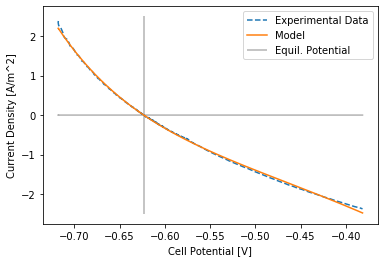

In [23]:
# paramys = [0.05151305, 0.37046147, 0.37045137]
paramys =j0_fit, aa_fit, ac_fit
# paramys = [5.27220332e-02, 8.16570098e-02, 4.85197831e-02]
# paramys =[(1.08614495e-05), 2.19024473e-01, 8.93331622e-01]
# paramys = [-.01,.4,.5]
print('j0: {:.2f}, aa: {:.3f}, ac: {:.3f}'.format(*paramys))
j_fits = BV(np.array(use_V),*paramys) #AMPS/m^2
# plt.plot(np.array(use_v)-0.544,np.zeros_like(use_v),'k',alpha=0.3)
plt.vlines(equil_potential,-2.5,2.5, alpha=0.3, label='Equil. Potential')
plt.plot(use_V,np.zeros_like(use_V),'k',alpha=0.3)
plt.plot(np.array(use_V),use_current_densities, '--',label='Experimental Data')
# plt.plot(np.array(use_V),np.array(use_I), '--',label='Experimental Data')
plt.plot(np.array(use_V),j_fits,label='Model')
plt.ylabel('Current Density [A/m^2]')
# plt.ylabel('Current [mA]')
plt.xlabel('Cell Potential [V]')
# plt.xlim(.1,1.25)
# plt.ylim(-.1,.1)
plt.legend()
plt.show()
# plt.savefig('model_vs_data.png',dpi=100)

# fig, ax1 = plt.subplots()

# color = 'tab:red'
# ax1.set_xlabel('voltage')
# ax1.set_ylabel('data I', color=color)
# ax1.plot(use_v,use_current_densities, '--',color=color)
# # ax1.plot(times,Power_demands, '*',color='tab:grey',label = 'Power Demand (kW)')
# ax1.tick_params(axis='y', labelcolor=color)
# # plt.legend(loc = 'upper center')

# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

# color = 'tab:blue'
# ax2.set_ylabel('model I', color=color)  # we already handled the x-label with ax1
# ax2.plot(use_v, j_fits, '-',color=color)
# ax2.tick_params(axis='y', labelcolor=color)

# fig.tight_layout()  # otherwise the right y-label is slightly clipped

# plt.show()

In [24]:
zn_params = paramys
%store zn_params

Stored 'zn_params' (tuple)
